In [100]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [101]:
df = pd.read_csv('Sales_v1.csv')


In [102]:
df.head()



,Segment,Country,Product,Discount Band,Units Sold,Manufacturing Price,Sale Price,Gross Sales,Discounts,Sales,COGS,Profit,Date,Month Number,Month Name,Year
0,Government,Germany,Carretera,None,1513.0,$3,$350,"$529,550",0.0,"$529,550","$393,380","$136,170",12/1/2014,12,December,2014
1,Government,Germany,Paseo,None,1006.0,$10,$350,"$352,100",0.0,"$352,100","$261,560","$90,540",6/1/2014,6,June,2014
2,Government,Canada,Paseo,None,1725.0,$10,$350,"$603,750",0.0,"$603,750","$448,500","$155,250",11/1/2013,11,November,2013
3,Government,Germany,Paseo,None,1513.0,$10,$350,"$529,550",0.0,"$529,550","$393,380","$136,170",12/1/2014,12,December,2014
4,Government,Germany,Velo,None,1006.0,$120,$350,"$352,100",0.0,"$352,100","$261,560","$90,540",6/1/2014,6,June,2014


In [75]:
df.columns

Index(['Segment', 'Country', 'Product', 'Discount Band', 'Units Sold',
       'Manufacturing Price', 'Sale Price', 'Gross Sales', 'Discounts',
       ' Sales', 'COGS', 'Profit', 'Date', 'Month Number', 'Month Name',
       'Year'],
      dtype='object')

In [67]:

df.describe()

,Units Sold,Discounts,Sales,Month Number,Year,Month
count,700.000000,700.000000,7.000000e+02,700.000000,700.000000,700.000000
mean,1608.294286,13150.354629,1.696091e+05,7.900000,2013.750000,7.900000
std,867.427859,22962.928775,2.367263e+05,3.377321,0.433322,3.377321
min,200.000000,0.000000,1.655080e+03,1.000000,2013.000000,1.000000
25%,905.000000,800.320000,1.592800e+04,5.750000,2013.750000,5.750000
50%,1542.500000,2585.250000,3.554020e+04,9.000000,2014.000000,9.000000
75%,2229.125000,15956.343750,2.610775e+05,10.250000,2014.000000,10.250000
max,4492.500000,149677.500000,1.159200e+06,12.000000,2014.000000,12.000000


In [50]:
df[' Sales'] = df[' Sales'].replace('[\$,]', '', regex=True).astype(float)
df['Date'] = pd.to_datetime(df['Date'])
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month

#### Sales Trend Over Time


In [43]:
print(df.columns)

Index(['Segment', 'Country', 'Product', 'Discount Band', 'Units Sold',
       'Manufacturing Price', 'Sale Price', 'Gross Sales', 'Discounts',
       ' Sales', 'COGS', 'Profit', 'Date', 'Month Number', 'Month Name',
       'Year', 'Month'],
      dtype='object')


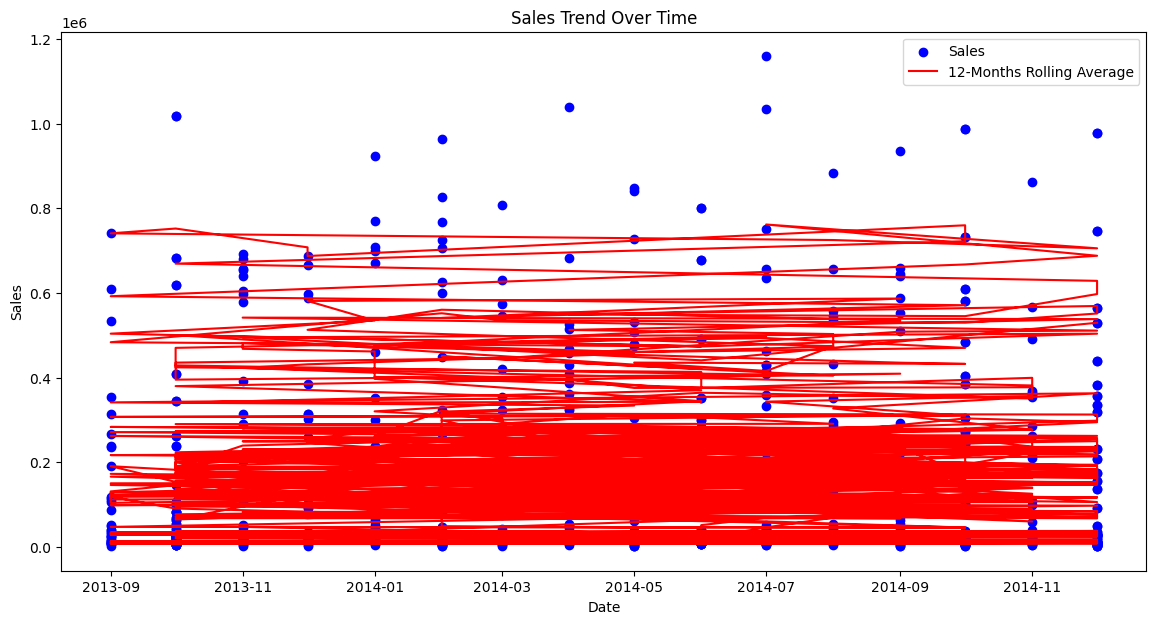

In [59]:
plt.figure(figsize=(14, 7))
plt.scatter(df['Date'], df[' Sales'], color='blue', label='Sales')
plt.plot(df['Date'], df[' Sales'].rolling(window=12, min_periods=1).mean(), color='red', label='12-Months Rolling Average')
plt.title('Sales Trend Over Time')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend()
plt.grid(True)
plt.show()


#### Seasonal Decomposition:

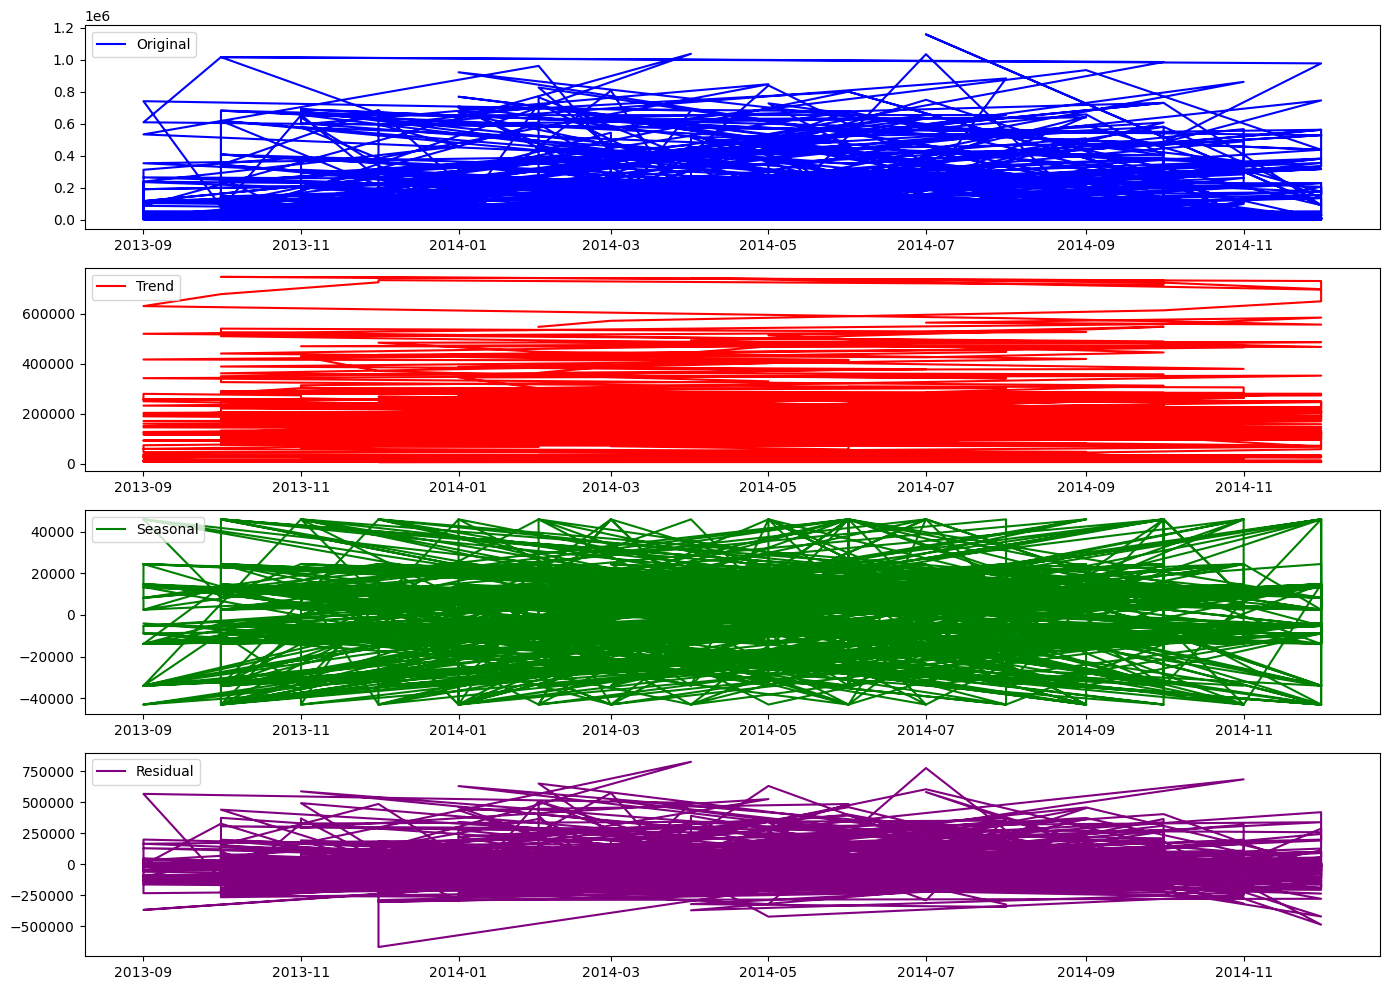

In [55]:
from statsmodels.tsa.seasonal import seasonal_decompose

df[' Sales'] = df[' Sales'].replace('[\$,]', '', regex=True).astype(float)

sales_series = df.set_index('Date')[' Sales']
decomposition = seasonal_decompose(sales_series, model='additive', period=12)

plt.figure(figsize=(14, 10))
plt.subplot(411)
plt.plot(sales_series, label='Original', color='blue')
plt.legend(loc='upper left')
plt.subplot(412)
plt.plot(decomposition.trend, label='Trend', color='red')
plt.legend(loc='upper left')
plt.subplot(413)
plt.plot(decomposition.seasonal, label='Seasonal', color='green')
plt.legend(loc='upper left')
plt.subplot(414)
plt.plot(decomposition.resid, label='Residual', color='purple')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()


#### Sales Distribution


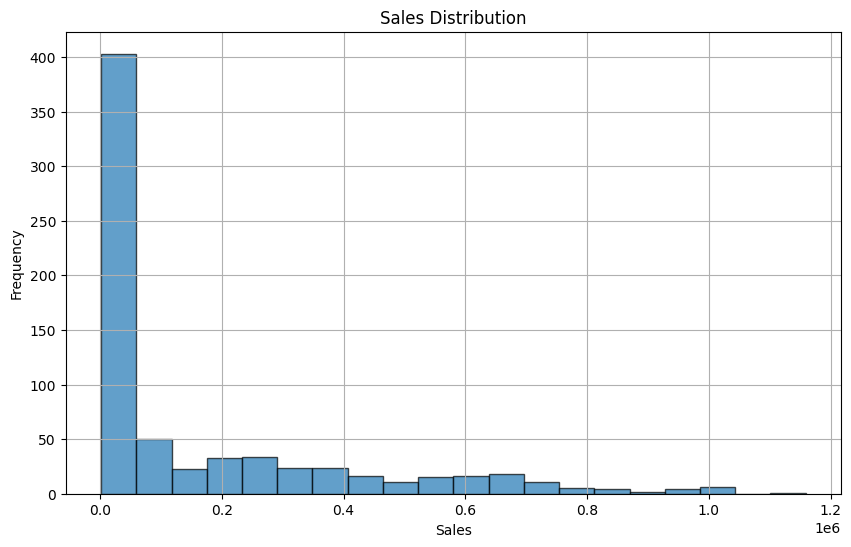

In [56]:
plt.figure(figsize=(10, 6))
plt.hist(df[' Sales'], bins=20, edgecolor='black', alpha=0.7)
plt.title('Sales Distribution')
plt.xlabel('Sales')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


#### Correlation Matrix:

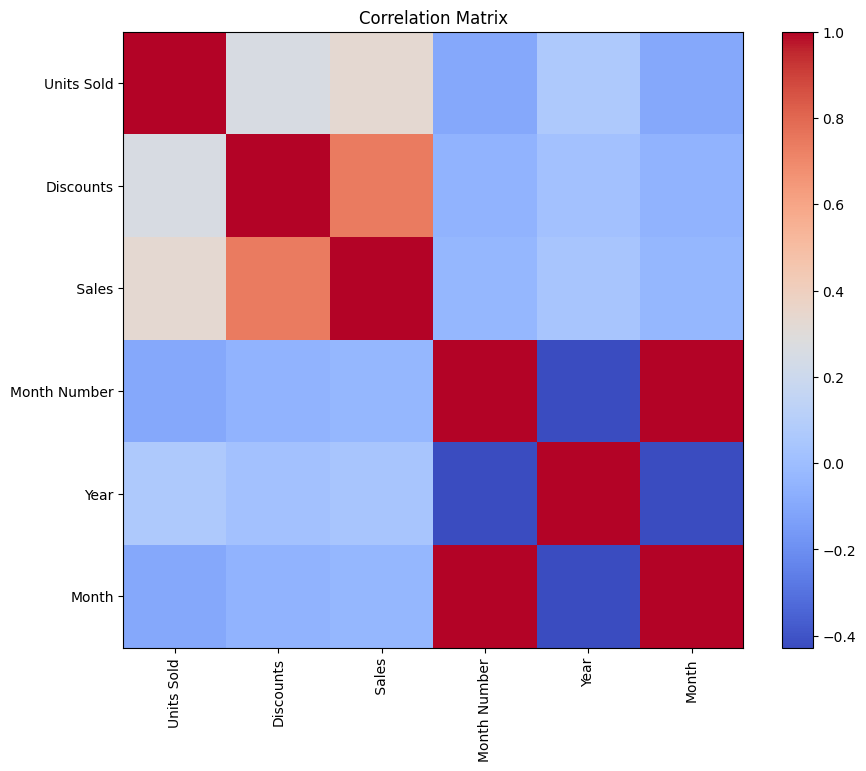

In [63]:
numerical_data = df.select_dtypes(include=['float64', 'int64'])
correlation_matrix = numerical_data.corr()

plt.figure(figsize=(10, 8))
plt.imshow(correlation_matrix, cmap='coolwarm', interpolation='none', aspect='auto')
plt.colorbar()
plt.xticks(range(len(correlation_matrix)), correlation_matrix.columns, rotation=90)
plt.yticks(range(len(correlation_matrix)), correlation_matrix.index)
plt.title('Correlation Matrix')
plt.show()


In [111]:
df.dropna(inplace=True)
def clean_currency(value):
    # Remove dollar sign and commas
    value = value.replace('$', '').replace(',', '')
    # Handle negative values enclosed in parentheses
    if value.startswith('(') and value.endswith(')'):
        value = '-' + value[1:-1]
    # Convert to float
    return float(value)
df[' Sales'] = df[' Sales'].replace('[\$,]', '', regex=True).astype(float)
df['COGS'] = df['COGS'].replace('[\$,]', '', regex=True).astype(float)
df['Profit'] = df['Profit'].apply(clean_currency)


In [112]:

features = ['Units Sold', 'COGS', 'Profit', 'Discounts']
X = df[features] 
y = df[' Sales']

In [113]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [114]:

model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print('Mean Squared Error:', mean_squared_error(y_test, y_pred))
print('R-squared:', r2_score(y_test, y_pred))


Mean Squared Error: 2.7039021665524093e-20
R-squared: 1.0


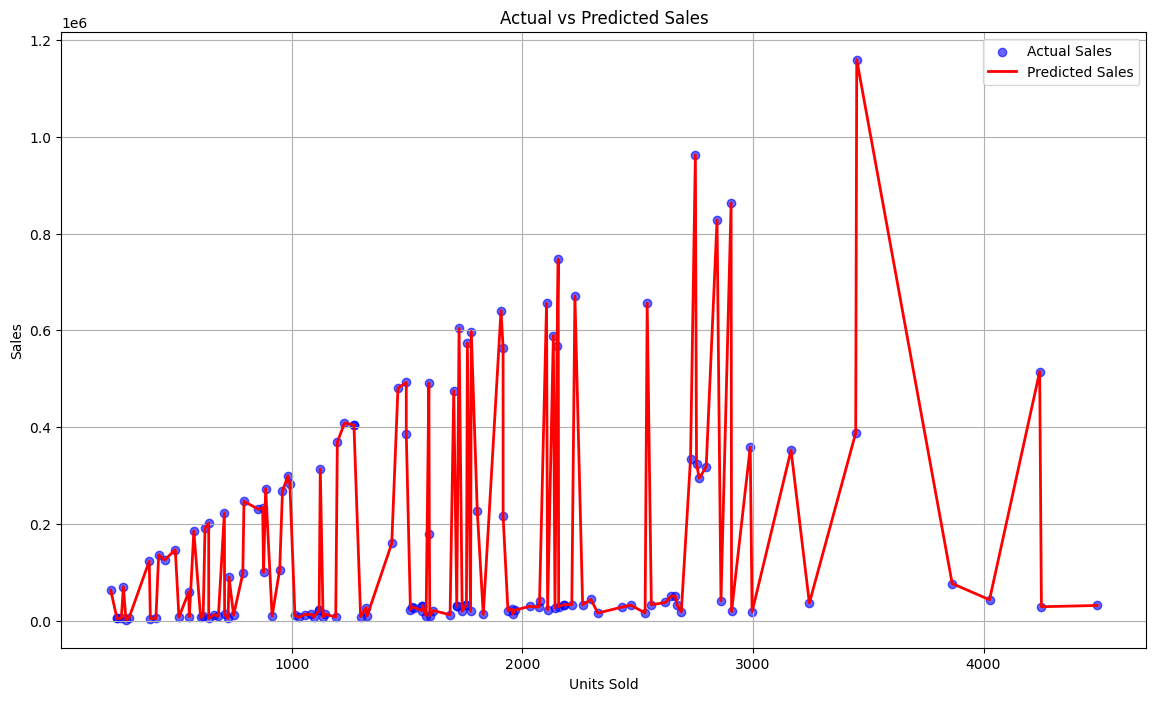

In [118]:
test_data = X_test.copy()
test_data['Actual Sales'] = y_test
test_data['Predicted Sales'] = y_pred

test_data = test_data.sort_values(by='Units Sold')

plt.figure(figsize=(14, 8))
plt.scatter(test_data['Units Sold'], test_data['Actual Sales'], color='blue', label='Actual Sales', alpha=0.6)
plt.plot(test_data['Units Sold'], test_data['Predicted Sales'], color='red', linewidth=2, label='Predicted Sales')
plt.title('Actual vs Predicted Sales')
plt.xlabel('Units Sold')
plt.ylabel('Sales')
plt.legend()
plt.grid(True)
plt.show()
